In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
from model_1 import *
from model_1 import Net1

In [10]:
# Training parameter
num_epochs = 3           
batch_size = 16           
seed = np.random.seed(1234) 

In [11]:
use_cuda = torch.cuda.is_available()

if use_cuda:
    computing_device = torch.device("cuda")
    extras = {"num_workers": 1, "pin_memory": True}
    print("CUDA is supported")
else: 
    computing_device = torch.device("cpu")
    extras = False
    print("CUDA NOT supported")

CUDA is supported


In [12]:
transform = transforms.Compose([transforms.Resize(512), transforms.ToTensor()])
train_loader, val_loader, test_loader = create_split_loaders(batch_size, seed, transform = transform, 
                                                             p_val = 0.1, p_test = 0.2,
                                                             shuffle = True, show_sample = False, 
                                                             extras = extras)

In [13]:
model = Net1()
model = model.to(computing_device)

criterion =  torch.nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [14]:
total_loss = []
avg_minibatch_loss = []

for epoch in range(num_epochs):
    N = 50
    N_minibatch_loss = 0.0 
    for minibatch_count, (images, labels) in enumerate(train_loader, 0):

        images, labels = images.to(computing_device), labels.to(computing_device)
        optimizer.zero_grad()
        outputs = model(images) # forward pass
        loss = criterion(outputs, labels) # compute loss
        loss.backward() # backprop
        optimizer.step() # weight update

        total_loss.append(loss.item())
        N_minibatch_loss += loss
        
        if (minibatch_count + 1) % N == 0:      
            N_minibatch_loss /= N
            print('Epoch: %d ! Average minibatch %d loss: %.3f' %
                (epoch + 1, minibatch_count + 1, N_minibatch_loss))
            avg_minibatch_loss.append(N_minibatch_loss)
            N_minibatch_loss = 0.0

    print("Finished", epoch + 1, "epochs of training")
print("Training complete after", epoch, "epochs")

Epoch: 1 ! Average minibatch 50 loss: 0.425
Epoch: 1 ! Average minibatch 100 loss: 0.189
Epoch: 1 ! Average minibatch 150 loss: 0.181
Epoch: 1 ! Average minibatch 200 loss: 0.178
Epoch: 1 ! Average minibatch 250 loss: 0.178
Epoch: 1 ! Average minibatch 300 loss: 0.169
Epoch: 1 ! Average minibatch 350 loss: 0.162
Epoch: 1 ! Average minibatch 400 loss: 0.156
Epoch: 1 ! Average minibatch 450 loss: 0.157
Epoch: 1 ! Average minibatch 500 loss: 0.165
Epoch: 1 ! Average minibatch 550 loss: 0.168
Epoch: 1 ! Average minibatch 600 loss: 0.150
Epoch: 1 ! Average minibatch 650 loss: 0.165
Epoch: 1 ! Average minibatch 700 loss: 0.173
Epoch: 1 ! Average minibatch 750 loss: 0.166
Epoch: 1 ! Average minibatch 800 loss: 0.163
Epoch: 1 ! Average minibatch 850 loss: 0.159
Epoch: 1 ! Average minibatch 900 loss: 0.152
Epoch: 1 ! Average minibatch 950 loss: 0.171
Epoch: 1 ! Average minibatch 1000 loss: 0.151
Finished 1 epochs of training
Epoch: 2 ! Average minibatch 50 loss: 0.151
Epoch: 2 ! Average minibat

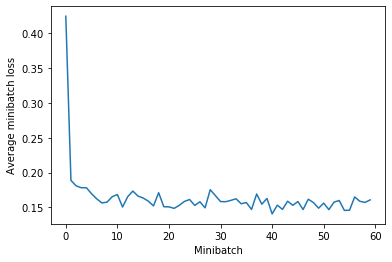

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.ylabel('Average minibatch loss')
plt.xlabel('Minibatch')
plt.plot(avg_minibatch_loss)
plt.savefig('Plots/fig_1_1.png')
plt.show()

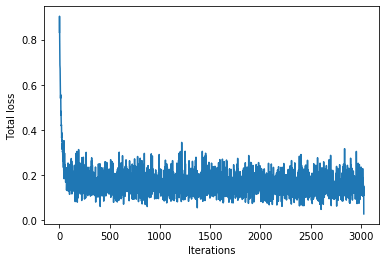

In [16]:
plt.ylabel('Total loss')
plt.xlabel('Iterations')
plt.plot(total_loss)
plt.savefig('Plots/fig_1_2.png')
plt.show()